# Python environment tweaks

If you are working in `binder` then install matplotlib

In [1]:
try:

    import matplotlib
    
except ModuleNotFoundError: 
    
    %pip install matplotlib

Check [matplotlib](https://matplotlib.org/) library is available

In [2]:
import matplotlib
matplotlib.__version__

'3.4.3'

Check `tubular` is available

In [3]:
import tubular
tubular.__version__

'0.3.1'

# Download dataset from the UCI Machine Learning Repository
We will be using the [Bank Marketing](https://archive.ics.uci.edu/ml/datasets/bank+marketing) data which represents a phone marketing campaign to sell term deposits. 

In [4]:
import pandas as pd
import numpy as np
import urllib
import zipfile

In [5]:
pd.set_option('display.max_columns', 50)

## Define data locations

In [6]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip"
zip_filename = "bank-additional.zip"
data_filename = "bank-additional/bank-additional-full.csv"

## Download and unzip data

In [7]:
r = urllib.request.urlretrieve(data_url, zip_filename)

In [8]:
with zipfile.ZipFile(zip_filename, "r") as zip_ref:
    
    zip_ref.extractall(".")

## Load data

In [9]:
df_original = pd.read_csv(data_filename, sep=";")
df_original.shape

(41188, 21)

Map the response to be numeric

In [10]:
df_original['y'] = df_original['y'].map({'no': 0, 'yes': 1})

Add a sample column

In [11]:
np.random.seed(1)
df_original["sample"] = np.random.random_sample(df_original.shape[0])

Remove columns not to be included in modelling

In [12]:
y_original = df_original["y"]
df_original = df_original.drop(columns = ["duration", "y"])

In [13]:
df_original.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  campaign  pdays  previous     poutcome  emp.var.rate  \
0   may         mon         1    999         0  nonexistent           1.1   
1   may         mon         1    999         0  nonexistent           1.1   
2   may         mon         1    999         0  nonexistent           1.1   
3   may         mon         1    999         0  nonexistent           1.1   
4   may         mon         1    999         0  nonexistent           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed    sample  
0          93.994          -36.4      4.857       5191.0  0.417022  
1          93.994          -36.4      4.857       5191.0  0.720324  
2          93.994          -36.4      4.857       5191.0  0.000114  
3          93.994          -36.4      4.857       5191.0  0.302333  
4          93.994          -36.4      4.857       5191.0  0.146756

In [14]:
y_original.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

# Explore data

In [15]:
df = df_original.copy()
y = y_original.copy()

### Response

In [16]:
y.mean()

0.11265417111780131

<AxesSubplot:>

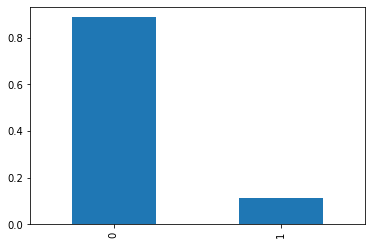

In [17]:
y.value_counts(normalize=True).plot(kind="bar")

### Explanatory variables

In [18]:
import plotting as p

In [19]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
sample            float64
dtype: object

#### Numeric

Add response back in just for the purposes of plotting

In [20]:
df["y"] = y

In [21]:
numeric_cols = list(df.select_dtypes('number').columns.values)

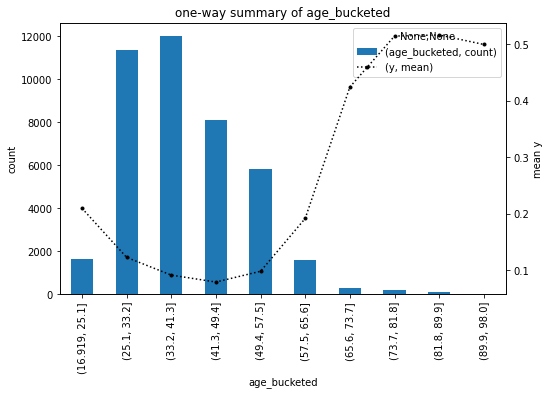

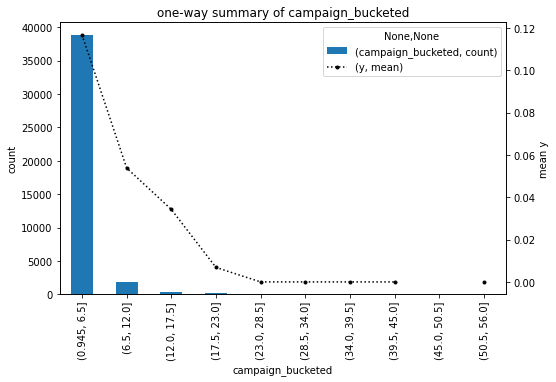

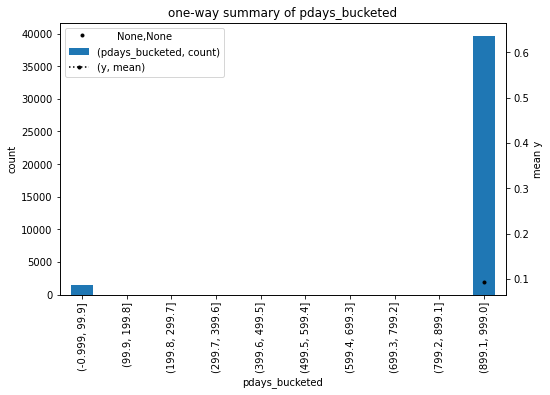

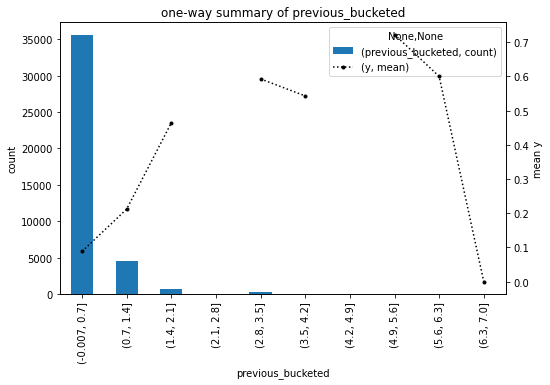

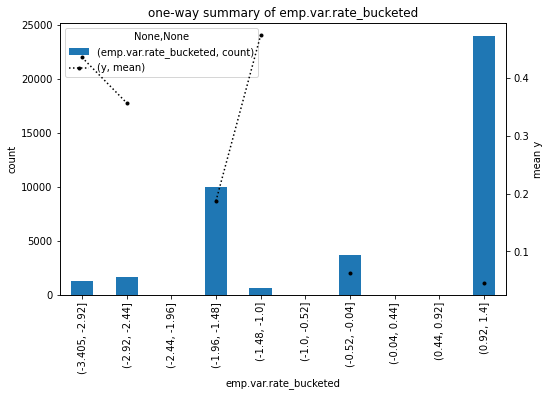

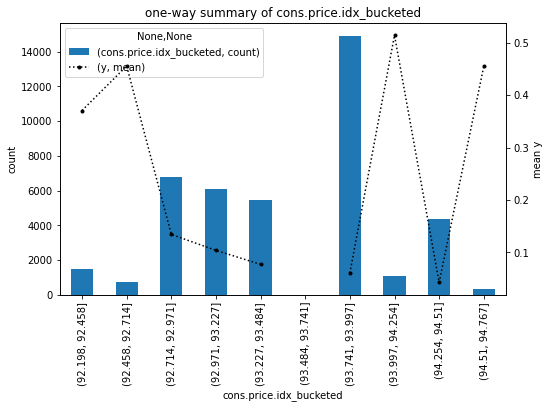

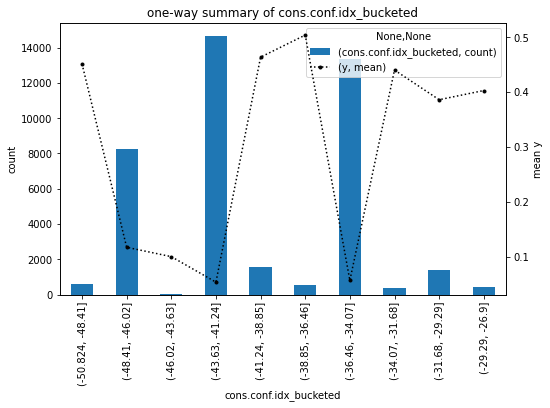

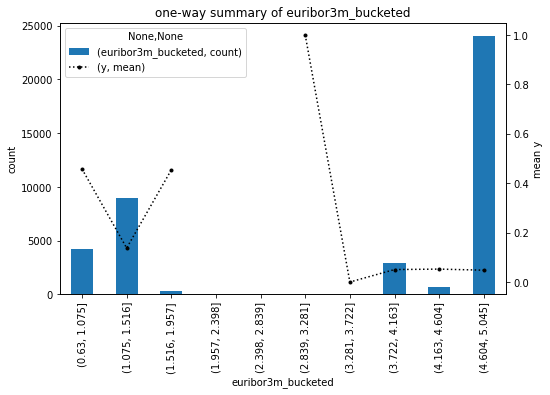

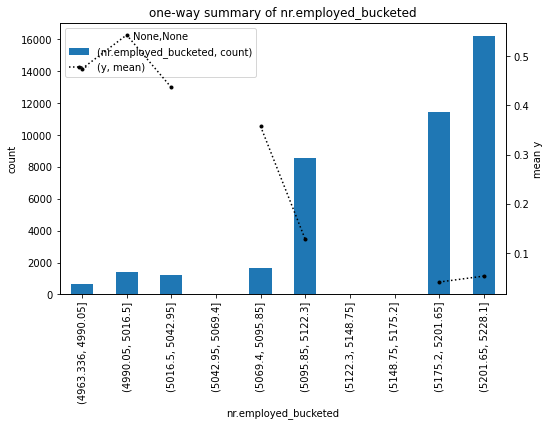

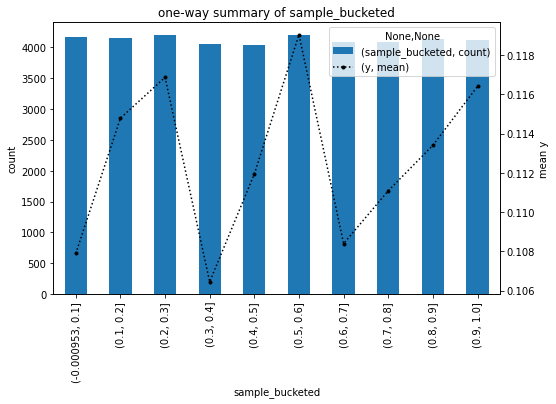

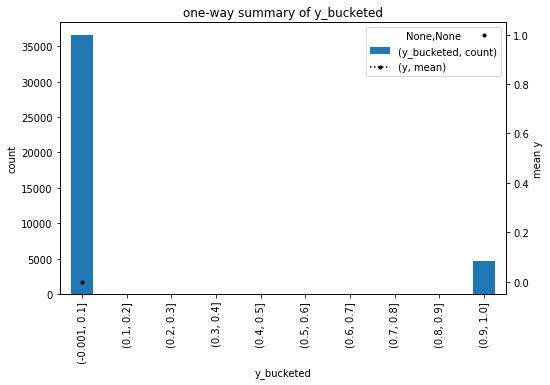

In [22]:
for col in numeric_cols:
    
    # bin the numeric for the purposes of visualisation
    bucketed_col = f"{col}_bucketed"
    df[bucketed_col] = pd.cut(df[col], bins = 10)
    
    p.one_way_summary_plot(df, bucketed_col)

#### Categorical

In [23]:
categorical_cols = list(df.select_dtypes('object').columns.values)

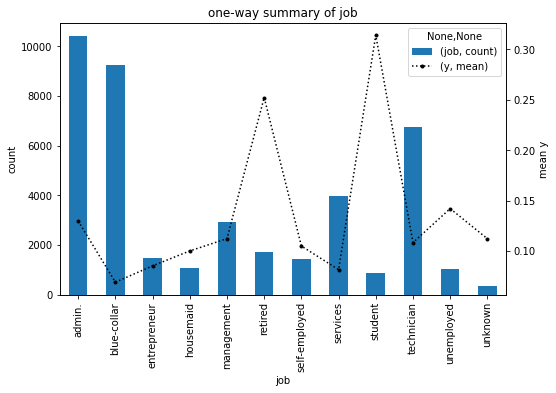

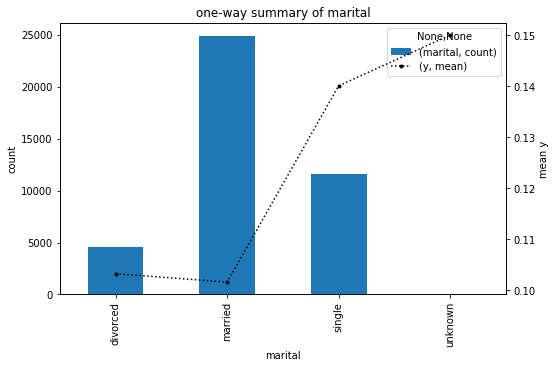

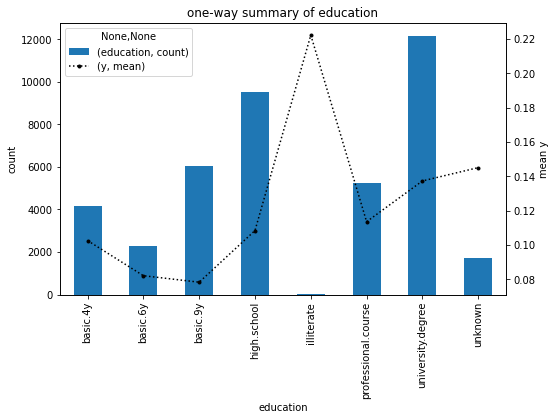

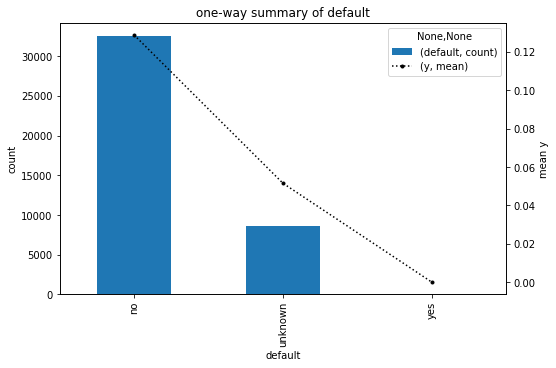

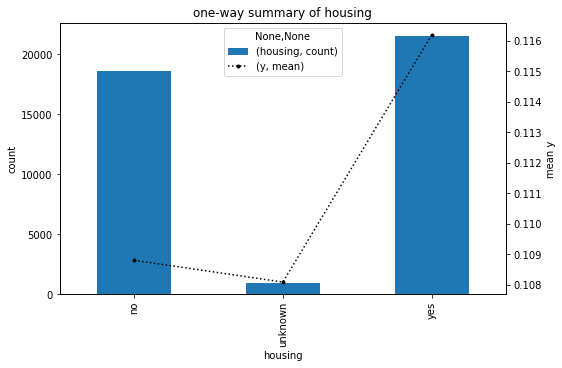

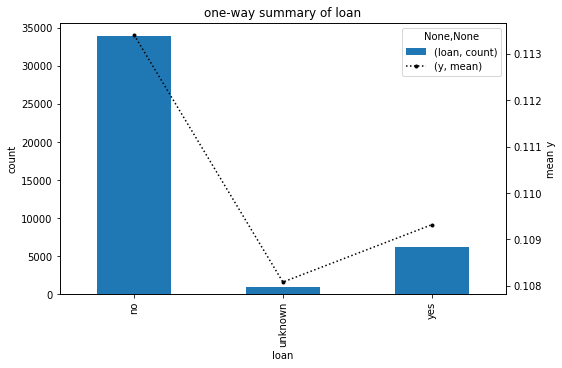

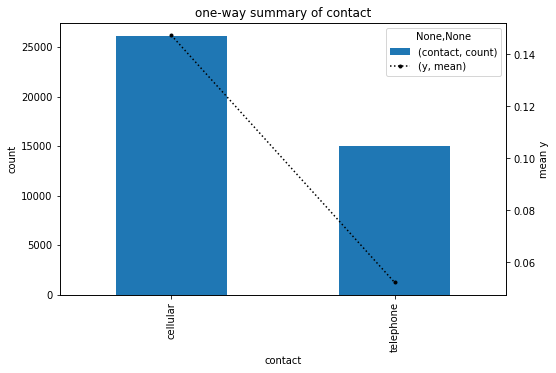

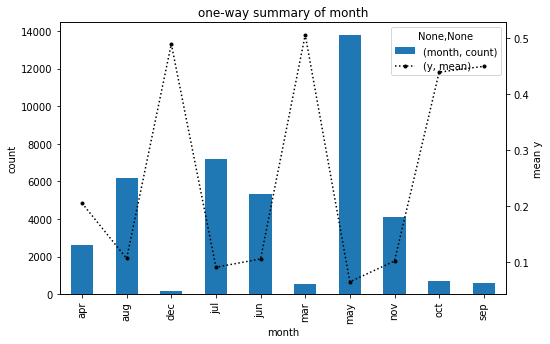

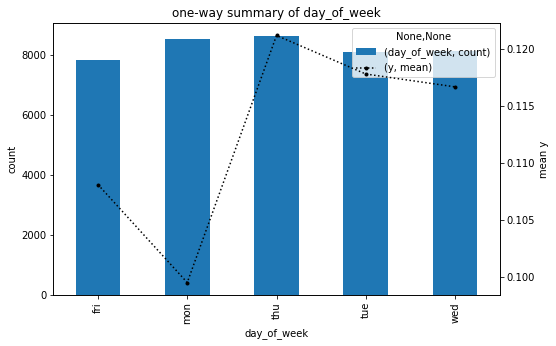

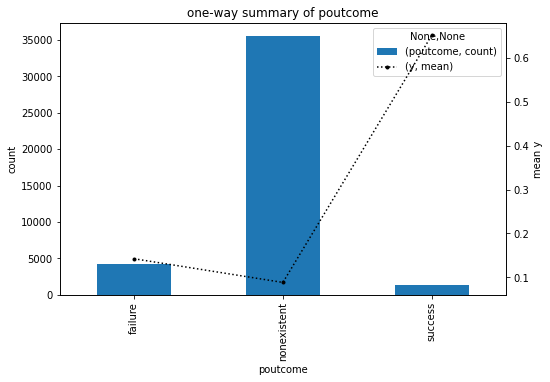

In [24]:
for col in categorical_cols:
    p.one_way_summary_plot(df, col)

Separate the response again after plotting

In [25]:
df = df.drop(columns = "y")

## Nulls

In [26]:
df.isnull().sum()

age                        0
job                        0
marital                    0
education                  0
default                    0
housing                    0
loan                       0
contact                    0
month                      0
day_of_week                0
campaign                   0
pdays                      0
previous                   0
poutcome                   0
emp.var.rate               0
cons.price.idx             0
cons.conf.idx              0
euribor3m                  0
nr.employed                0
sample                     0
age_bucketed               0
campaign_bucketed          0
pdays_bucketed             0
previous_bucketed          0
emp.var.rate_bucketed      0
cons.price.idx_bucketed    0
cons.conf.idx_bucketed     0
euribor3m_bucketed         0
nr.employed_bucketed       0
sample_bucketed            0
y_bucketed                 0
dtype: int64

In [27]:
(df == "unknown").sum()

age                           0
job                         330
marital                      80
education                  1731
default                    8597
housing                     990
loan                        990
contact                       0
month                         0
day_of_week                   0
campaign                      0
pdays                         0
previous                      0
poutcome                      0
emp.var.rate                  0
cons.price.idx                0
cons.conf.idx                 0
euribor3m                     0
nr.employed                   0
sample                        0
age_bucketed                  0
campaign_bucketed             0
pdays_bucketed                0
previous_bucketed             0
emp.var.rate_bucketed         0
cons.price.idx_bucketed       0
cons.conf.idx_bucketed        0
euribor3m_bucketed            0
nr.employed_bucketed          0
sample_bucketed               0
y_bucketed                    0
dtype: i

# Transformers
[Tubular](https://github.com/lvgig/tubular) implements various transformers that can be used to apply pre-processing steps prior to modelling.

In [28]:
from tubular.base import DataFrameMethodTransformer
from tubular.capping import CappingTransformer
from tubular.imputers import NearestMeanResponseImputer
from tubular.mapping import MappingTransformer
from tubular.nominal import GroupRareLevelsTransformer, OneHotEncodingTransformer, MeanResponseTransformer
from tubular.numeric import CutTransformer
from tubular.strings import SeriesStrMethodTransformer

In [29]:
df = df_original.copy()

## Capping
The [capping module](https://tubular.readthedocs.io/en/latest/api.html#capping-module) provides options for capping at min and max values.

In [30]:
capping_transformer = CappingTransformer(
    quantiles = {'age': [0.1, 0.9]},
    verbose = False
)

In [31]:
capping_transformer.fit(df)

CappingTransformer(capping_values={'age': [28.0, 55.0]},
                   quantiles={'age': [0.1, 0.9]})

In [32]:
df2 = capping_transformer.transform(df)

In [33]:
df['age'].min(), df2['age'].min()

(17, 28)

In [34]:
df['age'].max(), df2['age'].max()

(98, 55)

## Discretisation
The `CutTransformer` in the [numeric module](https://tubular.readthedocs.io/en/latest/api/tubular.numeric.CutTransformer.html) can be used to discretise or bucket a numeric column.

In [35]:
bucketing_transformer = CutTransformer(
    column = "previous", 
    new_column_name = "previous_bucketed", 
    cut_kwargs = {"bins": [0, 1, 2, 3, 10], "include_lowest": True, "right": False}, 
    verbose = False
)

In [36]:
df3 = bucketing_transformer.transform(df2)

In [37]:
df3['previous_bucketed'].value_counts()

[0, 1)     35563
[1, 2)      4561
[2, 3)       754
[3, 10)      310
Name: previous_bucketed, dtype: int64

## String extraction
The [strings module](https://tubular.readthedocs.io/en/latest/api.html#strings-module) currently only has one transformer, `SeriesStrMethodTransformer` that allows [pandas.Series.str](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.html) methods to be applied.

In [38]:
string_extraction_transformer = SeriesStrMethodTransformer(
    columns = "education",
    new_column_name = "basic_education",
    pd_method_name = "find",
    pd_method_kwargs = {"sub": "basic"}
)

In [39]:
df4 = string_extraction_transformer.transform(df3)

In [40]:
df4["basic_education"].value_counts(dropna = False)

-1    28675
 0    12513
Name: basic_education, dtype: int64

## Mapping
The `MappingTransformer` from the [mapping module](https://tubular.readthedocs.io/en/latest/api/tubular.mapping.MappingTransformer.html) provides a way to from one set of values to another.

In [41]:
mapping_transformer = MappingTransformer(
    mappings = {
        'job': {
            'admin.': 'new_group',
            'blue-collar': 'new_group',
            'housemaid': 'new_group'
        },
        'education': {
            'basic.4y': 1,
            'basic.6y': 2,
            'basic.9y': 3,
            'high.school': 4,
            'university.degree': 5,
            'professional.course': 6,
            'university.degree': 7,
            'unknown': np.NaN,
            'illiterate': 7
        },
        "default": {
            "no": 0, 
            "unknown": 0, 
            "yes": 1
        },
        "housing": {
            "no": 0, 
            "unknown": 0, 
            "yes": 1
        },
        "loan": {
            "no": 0, 
            "unknown": 0, 
            "yes": 1
        },
        "month": {
            "jan": "winter",
            "feb": "winter",
            "mar": "sping",
            "apr": "sping",
            "may": "sping",
            "jun": "summer",        
            "jul": "summer",
            "aug": "summer",
            "sep": "autumn",
            "oct": "autumn",
            "nov": "autumn",
            "dec": "winter",         
        }        
    }
)

In [42]:
df4 = mapping_transformer.transform(df3)

In [43]:
df4['job'].value_counts(dropna = False)

new_group        20736
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [44]:
df4['education'].value_counts(dropna = False)

7.0    12186
4.0     9515
3.0     6045
6.0     5243
1.0     4176
2.0     2292
NaN     1731
Name: education, dtype: int64

In [45]:
df4['default'].value_counts(dropna = False)

0    41185
1        3
Name: default, dtype: int64

In [46]:
df4['loan'].value_counts(dropna = False)

0    34940
1     6248
Name: loan, dtype: int64

In [47]:
df4['housing'].value_counts(dropna = False)

1    21576
0    19612
Name: housing, dtype: int64

In [48]:
df4['month'].value_counts(dropna = False)

summer    18670
sping     16947
autumn     5389
winter      182
Name: month, dtype: int64

## Sum

In [49]:
sum_transformer = DataFrameMethodTransformer(
    new_column_name = 'sum_debt', 
    pd_method_name = 'sum', 
    columns = ['loan', 'housing', 'default'], 
    pd_method_kwargs = {'axis': 1},
    drop_original = False,
)

In [50]:
df5 = sum_transformer.transform(df4)

In [51]:
df5['sum_debt'].value_counts(dropna = False)

1    20443
0    17053
2     3692
Name: sum_debt, dtype: int64

## Imputation
The [imputation module](https://tubular.readthedocs.io/en/latest/api.html#imputers-module) has various ways to deal with missing (`null`) values.

In [52]:
imputation_transformer = NearestMeanResponseImputer(
    columns = "education"
)

In [53]:
imputation_transformer.fit(X = df5, y = y)

NearestMeanResponseImputer(columns=['education'])

In [54]:
df6 = imputation_transformer.transform(df5)

In [55]:
df6["education"].isnull().sum()

0

## Nominal columns
The [nominal module](https://tubular.readthedocs.io/en/latest/api.html#nominal-module) contains different ways to treat categorical variables.

### Rare level grouping

In [56]:
grouping_transformer = GroupRareLevelsTransformer(
    columns = "job", 
    cut_off_percent = 0.05, 
    verbose = False
)

In [57]:
grouping_transformer.fit(df6)

GroupRareLevelsTransformer(columns=['job'], cut_off_percent=0.05)

In [58]:
df7 = grouping_transformer.transform(df6)

In [59]:
df7["job"].value_counts(dropna = False)

new_group     20736
rare           6816
technician     6743
services       3969
management     2924
Name: job, dtype: int64

### One hot encoding

In [60]:
one_hot_encoder = OneHotEncodingTransformer(
    columns = ["marital", "contact", "month", "day_of_week", "poutcome", "previous_bucketed"], 
    drop_original = True, 
    verbose = False
)

In [61]:
one_hot_encoder.fit(df7)

OneHotEncodingTransformer(columns=['marital', 'contact', 'month', 'day_of_week',
                                   'poutcome', 'previous_bucketed'],
                          drop_original=True)

In [62]:
df8 = one_hot_encoder.transform(df7)

/Users/richardangell/opt/miniconda3/envs/tubular-workshop/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### Mean response encoding

In [63]:
mean_response_transformer = MeanResponseTransformer(
    columns = "job",
    verbose = False
)

In [64]:
mean_response_transformer.fit(X = df8, y = y)

MeanResponseTransformer(columns=['job'])

In [65]:
df9 = mean_response_transformer.transform(df8)

In [66]:
df9['job'].value_counts(dropna = False).sort_index()

0.081381     3969
0.101080    20736
0.108260     6743
0.112175     2924
0.170628     6816
Name: job, dtype: int64

# Pipelines
[Pipelines](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) chain together several transformers.

In [67]:
from sklearn.pipeline import Pipeline

## Simple pipeline

In [68]:
pipeline_1 = Pipeline(
    steps = [
        (
            "capping",
            CappingTransformer(
                quantiles = {'age': [0.1, 0.9]},
                verbose = False
            )
        ),
        (
            "discretisation",
            CutTransformer(
                column = "previous", 
                new_column_name = "previous_bucketed", 
                cut_kwargs = {"bins": [0, 1, 2, 3, 10], "include_lowest": True, "right": False}, 
                verbose = False
            )
        ),
    ]
)

## Shorthand pipeline construction
[make_pipeline](https://scikit-learn.org/stable/modules/compose.html#construction) can be used as short-hand to create `Pipeline` objects without specifying names for steps

In [69]:
from sklearn.pipeline import make_pipeline

In [70]:
make_pipeline(
    CappingTransformer(
        quantiles = {'age': [0.1, 0.9]},
        verbose = False
    ),
    CutTransformer(
        column = "previous", 
        new_column_name = "previous_bucketed", 
        cut_kwargs = {"bins": [0, 1, 2, 3, 10], "include_lowest": True, "right": False}, 
        verbose = False
    )
)

Pipeline(steps=[('cappingtransformer',
                 CappingTransformer(capping_values={},
                                    quantiles={'age': [0.1, 0.9]})),
                ('cuttransformer',
                 CutTransformer(column='previous',
                                cut_kwargs={'bins': [0, 1, 2, 3, 10],
                                            'include_lowest': True,
                                            'right': False},
                                new_column_name='previous_bucketed'))])

## `fit`, `transform`, `fit_transform`

In [71]:
df = df_original.copy()

In [72]:
test_sample_cut_off = 0.8

In [73]:
X_train = df.loc[df["sample"] < test_sample_cut_off]
X_test = df.loc[df["sample"] >= test_sample_cut_off]
y_train = y.loc[df["sample"] < test_sample_cut_off]
y_test = y.loc[df["sample"] >= test_sample_cut_off]
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(32946, 20) (8242, 20) (32946,) (8242,)


In [74]:
pipeline_1.fit(X_train, y_train)

Pipeline(steps=[('capping',
                 CappingTransformer(capping_values={'age': [28.0, 55.0]},
                                    quantiles={'age': [0.1, 0.9]})),
                ('discretisation',
                 CutTransformer(column='previous',
                                cut_kwargs={'bins': [0, 1, 2, 3, 10],
                                            'include_lowest': True,
                                            'right': False},
                                new_column_name='previous_bucketed'))])

In [75]:
X_train_transformed = pipeline_1.transform(X_train)

In [76]:
X_train_transformed2 = pipeline_1.fit_transform(X_train, y_train)

## Larger pipeline

In [77]:
all_mappings = {
    'job': {
        'admin.': 'new_group',
        'blue-collar': 'new_group',
        'housemaid': 'new_group'
    },
    'education': {
        'basic.4y': 1,
        'basic.6y': 2,
        'basic.9y': 3,
        'high.school': 4,
        'university.degree': 5,
        'professional.course': 6,
        'university.degree': 7,
        'unknown': np.NaN,
        'illiterate': 7
    },
    "default": {
        "no": 0, 
        "unknown": 0, 
        "yes": 1
    },
    "housing": {
        "no": 0, 
        "unknown": 0, 
        "yes": 1
    },
    "loan": {
        "no": 0, 
        "unknown": 0, 
        "yes": 1
    },
    "month": {
        "jan": "winter",
        "feb": "winter",
        "mar": "sping",
        "apr": "sping",
        "may": "sping",
        "jun": "summer",        
        "jul": "summer",
        "aug": "summer",
        "sep": "autumn",
        "oct": "autumn",
        "nov": "autumn",
        "dec": "winter",         
    }        
}

In [78]:
pipeline_2 = Pipeline(
    steps = [
        (
            "capping",
            CappingTransformer(
                capping_values = {'age': [10, 55]},
                verbose = False
            )
        ),
        (
            "discretisation",
            CutTransformer(
                column = "previous", 
                new_column_name = "previous_bucketed", 
                cut_kwargs = {"bins": [0, 1, 2, 3, 10], "include_lowest": True, "right": False}, 
                verbose = False
            )
        ),
        (
            "string_extraction",
            SeriesStrMethodTransformer(
                columns = "education",
                new_column_name = "basic_education",
                pd_method_name = "find",
                pd_method_kwargs = {"sub": "basic"}
            )
        ),
        (
            "mappings",
            MappingTransformer(
                mappings = all_mappings
            )
        ),
        (
            "sum",
            DataFrameMethodTransformer(
                new_column_name = 'sum_debt', 
                pd_method_name = 'sum', 
                columns = ['loan', 'housing', 'default'], 
                pd_method_kwargs = {'axis': 1},
                drop_original = False,
            )
        ),
        (
            "imputation",
            NearestMeanResponseImputer(
                columns = "education"
            )
        ),
        (
            "rare_level_grouping",
            GroupRareLevelsTransformer(
                columns = "job", 
                cut_off_percent = 0.05, 
                verbose = False
            )
        ),
        (
            "one_hot_encoding",
            OneHotEncodingTransformer(
                columns = ["marital", "contact", "month", "day_of_week", "poutcome", "previous_bucketed"], 
                drop_original = True, 
                verbose = False
            )
        ),
        (
            "mean_response_encoding",
            MeanResponseTransformer(
                columns = "job",
                verbose = False
            )
        ) 
    ],
    verbose = True
)

In [79]:
X_train_transformed3 = pipeline_2.fit_transform(X_train, y_train)

/Users/richardangell/opt/miniconda3/envs/tubular-workshop/lib/python3.8/site-packages/tubular/capping.py:206: UserWarning: quantiles not set so no fitting done in CappingTransformer
  warnings.warn("quantiles not set so no fitting done in CappingTransformer")


[Pipeline] ........... (step 1 of 9) Processing capping, total=   0.0s
[Pipeline] .... (step 2 of 9) Processing discretisation, total=   0.0s
[Pipeline] . (step 3 of 9) Processing string_extraction, total=   0.0s
[Pipeline] .......... (step 4 of 9) Processing mappings, total=   0.1s
[Pipeline] ............... (step 5 of 9) Processing sum, total=   0.0s
[Pipeline] ........ (step 6 of 9) Processing imputation, total=   0.0s
[Pipeline]  (step 7 of 9) Processing rare_level_grouping, total=   0.0s
[Pipeline] .. (step 8 of 9) Processing one_hot_encoding, total=   0.2s
[Pipeline]  (step 9 of 9) Processing mean_response_encoding, total=   0.0s


/Users/richardangell/opt/miniconda3/envs/tubular-workshop/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Persisting pipelines
Pipelines can be persisted using [joblib](https://joblib.readthedocs.io/en/latest/) more info on persisting pipeline-type objects can be found [here](https://scikit-learn.org/stable/modules/model_persistence.html).

In [80]:
import joblib

In [81]:
joblib.dump(pipeline_2, "pipeline_2.pkl")

['pipeline_2.pkl']

In [82]:
pipeline_2_reload = joblib.load("pipeline_2.pkl")

In [83]:
pipeline_2_reload

Pipeline(steps=[('capping',
                 CappingTransformer(capping_values={'age': [10, 55]})),
                ('discretisation',
                 CutTransformer(column='previous',
                                cut_kwargs={'bins': [0, 1, 2, 3, 10],
                                            'include_lowest': True,
                                            'right': False},
                                new_column_name='previous_bucketed')),
                ('string_extraction',
                 SeriesStrMethodTransformer(columns=['education'],
                                            new_column_name='basic_education',
                                            pd_method...
                 NearestMeanResponseImputer(columns=['education'])),
                ('rare_level_grouping',
                 GroupRareLevelsTransformer(columns=['job'],
                                            cut_off_percent=0.05)),
                ('one_hot_encoding',
                 OneHotEncod

## Visualising pipelines
Scikit-learn's `utils` module contains the `estimator_html_repr` function which writes a pipeline to html, this can then be saved to a file.

An example of visualising a more complex pipeline can be seen in the sklearn docs [here](https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html#html-representation-of-pipeline-display-diagram).

In [84]:
from sklearn.utils import estimator_html_repr
from IPython.display import HTML

In [85]:
with open('pipeline_2.html', 'w') as f:
    
    f.write(estimator_html_repr(pipeline_2))

In [86]:
HTML(filename="pipeline_2.html")

Alternatively we can use `set_config` to change how pipelines are natively displayed -

In [87]:
from sklearn import set_config

In [88]:
set_config(display="diagram")

In [89]:
pipeline_2

Pipeline(steps=[('capping',
                 CappingTransformer(capping_values={'age': [10, 55]})),
                ('discretisation',
                 CutTransformer(column='previous',
                                cut_kwargs={'bins': [0, 1, 2, 3, 10],
                                            'include_lowest': True,
                                            'right': False},
                                new_column_name='previous_bucketed')),
                ('string_extraction',
                 SeriesStrMethodTransformer(columns=['education'],
                                            new_column_name='basic_education',
                                            pd_method...
                 NearestMeanResponseImputer(columns=['education'])),
                ('rare_level_grouping',
                 GroupRareLevelsTransformer(columns=['job'],
                                            cut_off_percent=0.05)),
                ('one_hot_encoding',
                 OneHotEncodingTransformer(columns=['marital', 'contact',
                                                    'month', 'day_of_week',
                                                    'poutcome',
                                                    'previous_bucketed'],
                                           drop_original=True)),
                ('mean_response_encoding',
                 MeanResponseTransformer(columns=['job']))],
         verbose=True)

In [90]:
set_config(display="text")

In [91]:
pipeline_2

Pipeline(steps=[('capping',
                 CappingTransformer(capping_values={'age': [10, 55]})),
                ('discretisation',
                 CutTransformer(column='previous',
                                cut_kwargs={'bins': [0, 1, 2, 3, 10],
                                            'include_lowest': True,
                                            'right': False},
                                new_column_name='previous_bucketed')),
                ('string_extraction',
                 SeriesStrMethodTransformer(columns=['education'],
                                            new_column_name='basic_education',
                                            pd_method...
                 NearestMeanResponseImputer(columns=['education'])),
                ('rare_level_grouping',
                 GroupRareLevelsTransformer(columns=['job'],
                                            cut_off_percent=0.05)),
                ('one_hot_encoding',
                 OneHotEncod

# Pipeline with an estimator (model)
A model can be added as the last step in a pipeline.

In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

First build a model separate from the data processing pipeline

In [93]:
model = RandomForestClassifier(
    random_state = 10,
    n_estimators = 30,
    max_depth = 3
)

In [94]:
model.fit(X_train_transformed3, y_train)

RandomForestClassifier(max_depth=3, n_estimators=30, random_state=10)

In [95]:
X_test_transformed = pipeline_2.transform(X_test)

/Users/richardangell/opt/miniconda3/envs/tubular-workshop/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [96]:
test_predictions = model.predict(X_test_transformed)

In [97]:
roc_auc_score(y_test, test_predictions)

0.5822230006665831

Now add the model as the final step in a new pipeline

In [98]:
pipeline_with_model = Pipeline(
    steps = [
        (
            "data_preprocessing",
            pipeline_2
        ),
        (
            "model",
            RandomForestClassifier(
                random_state = 10, 
                n_estimators = 30,
                max_depth = 3
            )
        )
    ],
    verbose = True
)

In [99]:
pipeline_with_model.fit(X_train, y_train)

/Users/richardangell/opt/miniconda3/envs/tubular-workshop/lib/python3.8/site-packages/tubular/capping.py:206: UserWarning: quantiles not set so no fitting done in CappingTransformer
  warnings.warn("quantiles not set so no fitting done in CappingTransformer")


[Pipeline] ........... (step 1 of 9) Processing capping, total=   0.0s
[Pipeline] .... (step 2 of 9) Processing discretisation, total=   0.0s
[Pipeline] . (step 3 of 9) Processing string_extraction, total=   0.0s
[Pipeline] .......... (step 4 of 9) Processing mappings, total=   0.1s
[Pipeline] ............... (step 5 of 9) Processing sum, total=   0.0s
[Pipeline] ........ (step 6 of 9) Processing imputation, total=   0.0s
[Pipeline]  (step 7 of 9) Processing rare_level_grouping, total=   0.0s


/Users/richardangell/opt/miniconda3/envs/tubular-workshop/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


[Pipeline] .. (step 8 of 9) Processing one_hot_encoding, total=   0.2s
[Pipeline]  (step 9 of 9) Processing mean_response_encoding, total=   0.0s
[Pipeline]  (step 1 of 2) Processing data_preprocessing, total=   0.3s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.3s


Pipeline(steps=[('data_preprocessing',
                 Pipeline(steps=[('capping',
                                  CappingTransformer(capping_values={'age': [10,
                                                                             55]})),
                                 ('discretisation',
                                  CutTransformer(column='previous',
                                                 cut_kwargs={'bins': [0, 1, 2,
                                                                      3, 10],
                                                             'include_lowest': True,
                                                             'right': False},
                                                 new_column_name='previous_bucketed')),
                                 ('string_extraction',
                                  SeriesStrMethodTransformer(columns=['education'],
                                                             new_c...
             

In [100]:
test_predictions_2 = pipeline_with_model.predict(X_test)

/Users/richardangell/opt/miniconda3/envs/tubular-workshop/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [101]:
roc_auc_score(y_test, test_predictions_2)

0.5822230006665831

# Parameter tuning
With a model at the end of the pipeline the data processing parameters can be included in the parameter tuning as well.

In [102]:
from sklearn.model_selection import RandomizedSearchCV

In [103]:
param_grid = {
    "data_preprocessing__rare_level_grouping__cut_off_percent": [0.01, 0.05, 0.1],
    "model__max_depth": [2, 5, 7],
    "model__n_estimators": range(60, 100, 20)
}

In [104]:
random_search = RandomizedSearchCV(
    estimator = pipeline_with_model,
    param_distributions = param_grid,
    scoring = 'roc_auc',
    n_jobs = -1,
    cv = 3,
    random_state = 1234,
    verbose = True    
)

In [105]:
random_search.fit(
    X = X_train, y = y_train
)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/Users/richardangell/opt/miniconda3/envs/tubular-workshop/lib/python3.8/site-packages/tubular/capping.py:206: UserWarning: quantiles not set so no fitting done in CappingTransformer
  warnings.warn("quantiles not set so no fitting done in CappingTransformer")


[Pipeline] ........... (step 1 of 9) Processing capping, total=   0.0s
[Pipeline] .... (step 2 of 9) Processing discretisation, total=   0.0s
[Pipeline] . (step 3 of 9) Processing string_extraction, total=   0.0s
[Pipeline] .......... (step 4 of 9) Processing mappings, total=   0.1s
[Pipeline] ............... (step 5 of 9) Processing sum, total=   0.0s
[Pipeline] ........ (step 6 of 9) Processing imputation, total=   0.0s
[Pipeline]  (step 7 of 9) Processing rare_level_grouping, total=   0.0s


/Users/richardangell/opt/miniconda3/envs/tubular-workshop/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


[Pipeline] .. (step 8 of 9) Processing one_hot_encoding, total=   0.3s
[Pipeline]  (step 9 of 9) Processing mean_response_encoding, total=   0.0s
[Pipeline]  (step 1 of 2) Processing data_preprocessing, total=   0.5s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.4s


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('data_preprocessing',
                                              Pipeline(steps=[('capping',
                                                               CappingTransformer(capping_values={'age': [10,
                                                                                                          55]})),
                                                              ('discretisation',
                                                               CutTransformer(column='previous',
                                                                              cut_kwargs={'bins': [0,
                                                                                                   1,
                                                                                                   2,
                                                                                                   3,
                       

In [106]:
random_search.best_params_

{'model__n_estimators': 60,
 'model__max_depth': 2,
 'data_preprocessing__rare_level_grouping__cut_off_percent': 0.01}

In [107]:
test_predictions_3 = random_search.predict(X_test)

/Users/richardangell/opt/miniconda3/envs/tubular-workshop/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Note, we have done limited tuning so performance is not better than above.

In [108]:
roc_auc_score(y_test, test_predictions_3)

0.570559169933841